# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [42]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_merged = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_merged

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df["Mouse ID"].isin(duplicate_merged)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [46]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_value = cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_value = cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance = cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_std_dev = cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_std_err = cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_value,
                         "Median Tumor Volume":median_tumor_value,
                         "Tumor Volume Variance":tumor_volume_variance,
                         "Tumor Volume Std. Dev.":tumor_volume_std_dev,
                         "Tumor Volume Std. Err":tumor_volume_std_err})
stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

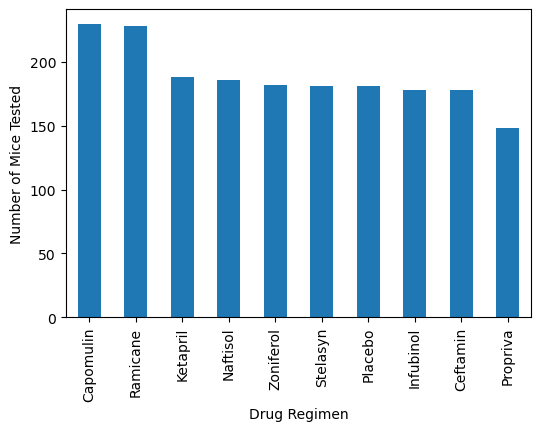

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_pandas = cleaned_df["Drug Regimen"].value_counts().plot(kind="bar", figsize=(6,4))
bar_plot_pandas.set_xlabel("Drug Regimen")
bar_plot_pandas.set_ylabel("Number of Mice Tested")
bar_plot_pandas


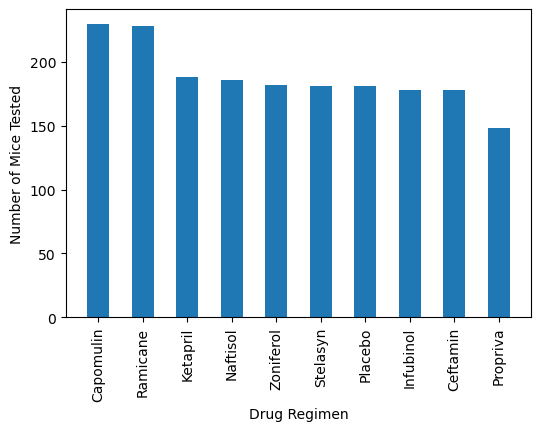

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis_values_pyplot = cleaned_df["Drug Regimen"].value_counts()

# Set x axis and tick locations
x_axis = np.arange(len(xaxis_values_pyplot))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, xaxis_values_pyplot, width = 0.5)
plt.xticks(tick_locations, xaxis_values_pyplot.index.values)

# Make tick marks legible
plt.xticks(rotation=90)

# Label Axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.show()

<AxesSubplot:ylabel='Sex'>

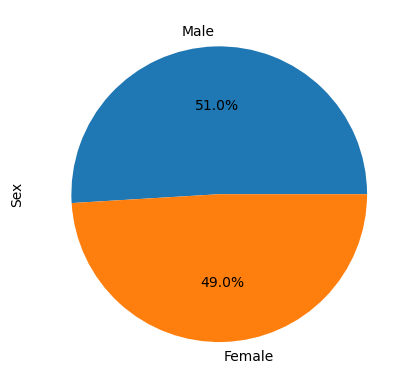

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Determine Mice tested sex split
gender_data = cleaned_df["Sex"].value_counts()

# Plot a pie chart using pandas
gender_pandas = gender_data.plot.pie(autopct="%1.1f%%", startangle=0)
gender_pandas


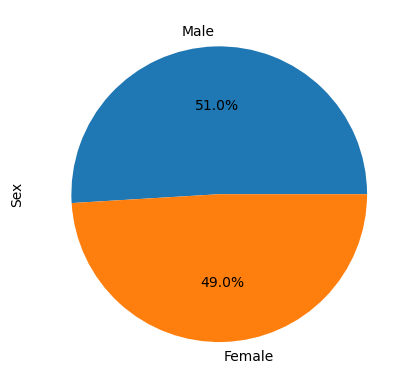

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Determine Mice tested sex split
gender_data = cleaned_df["Sex"].value_counts()

# Create a pie chart using matplotlib
plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
treatment_df = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max().sort_values().reset_index()
treatment_df



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_df = pd.merge(cleaned_df, treatment_df, on="Mouse ID", how="left")
new_merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,f932,Ketapril,Male,15,29,0,45.000000,0,0
2,g107,Ketapril,Female,2,29,0,45.000000,0,35
3,a457,Ketapril,Female,11,30,0,45.000000,0,10
4,c819,Ketapril,Male,21,25,0,45.000000,0,40
...,...,...,...,...,...,...,...,...,...
1875,r944,Capomulin,Male,12,25,45,41.581521,2,45
1876,u364,Capomulin,Male,18,17,45,31.023923,3,45
1877,p438,Ceftamin,Female,11,26,45,61.433892,1,45
1878,x773,Placebo,Female,21,30,45,58.634971,4,45


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drugs_list_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:
    
    # add subset 
    drugs_df = new_merged_df.loc[new_merged_df["Drug Regimen"] == drug]
    
    drug_values_df = drugs_df.loc[drugs_df["Timepoint_y"] == drugs_df['Timepoint_y']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_drugs = drug_values_df['Tumor Volume (mm3)']
    drugs_list_values.append(final_drugs)
   
    # display the interquartile range for each treatment group
    quartiles = final_drugs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # display the outliers for each treatment group
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    
    determine_outliers = (final_drugs.loc[(drug_values_df["Tumor Volume (mm3)"] >= upper_bound) | (drug_values_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    
    print(f"Number of {drug} outliers: {determine_outliers}")

IQR for Capomulin: 7.314067135000002
Lower Bound for Capomulin: 26.714832162499995
Upper Bound for Capomulin: 55.9711007025
Number of Capomulin outliers: 2
IQR for Ramicane: 8.325365415
Lower Bound for Ramicane: 24.1865864625
Upper Bound for Ramicane: 57.488048122500004
Number of Ramicane outliers: 1
IQR for Infubinol: 10.002090667500006
Lower Bound for Infubinol: 32.309217298749985
Upper Bound for Infubinol: 72.31757996875001
Number of Infubinol outliers: 0
IQR for Ceftamin: 9.593010457500007
Lower Bound for Ceftamin: 32.81891142624998
Upper Bound for Ceftamin: 71.19095325625001
Number of Ceftamin outliers: 0


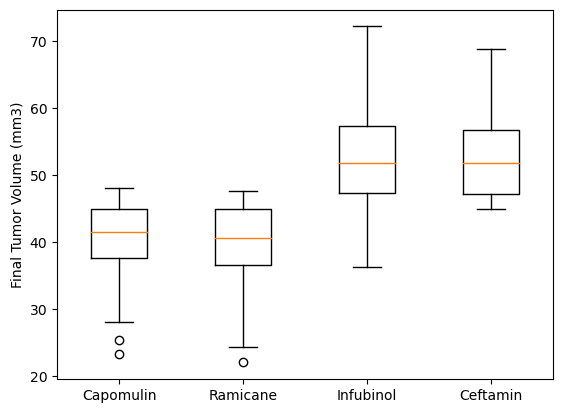

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(drugs_list_values)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

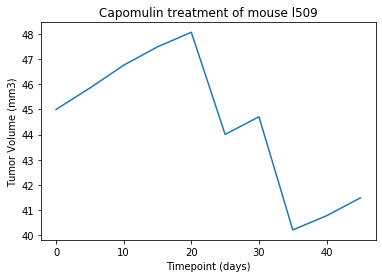

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



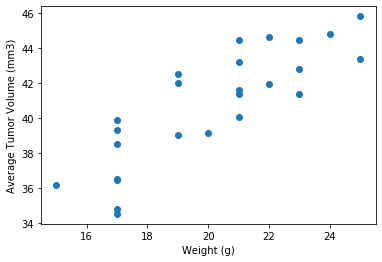

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


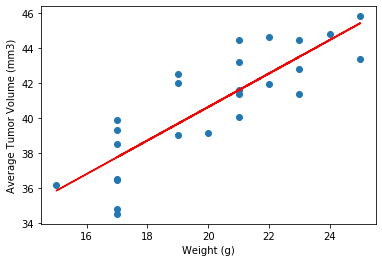

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

